In [10]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

%matplotlib inline 

In [ ]:
Загрузите датасет transaction_data.csv. 
Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.


In [2]:
transact = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/tasks/transaction_data.csv')
transact

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [5]:
transact.dtypes

date           datetime64[ns]
name                   object
transaction            object
dtype: object

In [4]:
transact['date'] = pd.to_datetime(transact.date)

In [60]:
transact.describe()  

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692
first,2020-03-02 00:00:00,NaN,NaN
last,2020-03-02 01:29:05,NaN,NaN


In [63]:
# Вопрос: сколько в датасете пропущенных значений?

nan = transact.isna().sum()
nan

date           0
name           0
transaction    0
dtype: int64

In [6]:
# Проверьте, какие значения принимает колонка transaction. 
# Сколько наблюдений относятся к тому или иному уровню? 

tr_count = transact.groupby('transaction', as_index=False).agg({'name':'count'})
tr_count

,transaction,name
0,cancelled,1619
1,error,4
2,successfull,3692


In [12]:
tr = transact.transaction.count()
tr

5315

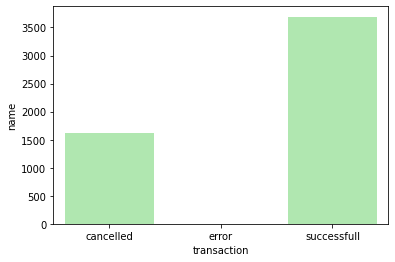

In [8]:
# Визуализируйте результат с помощью барплота.

plt.figure(figsize=(6,4))
sns.barplot(x='transaction', y='name', data=tr_count, 
            color='lightgreen', alpha=0.8)
plt.show()

In [9]:
# Сколько транзакций осуществил каждый из пользователей? 
# Осуществлёнными считаются транзакции со значением successfull

user_suc = transact.query("transaction=='successfull'").groupby('name', as_index=False).agg({'transaction':'count'})
user_suc

,name,transaction
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68
5,Ekaterina_Polyanova,68
6,Ekaterina_Smirnova,77
7,Irina_Fedorova,62
8,Irina_Ivanova,60
9,Irina_Lesnova,76


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


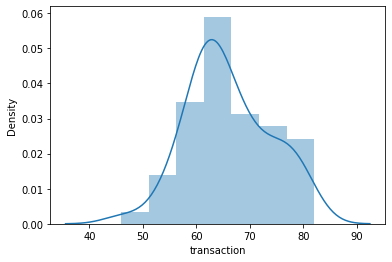

In [10]:
# Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, 
# совершённых каждым пользователем, где:
#     по оси x – число транзакций
#     по оси y – доля пользователей с таким числом транзакций

sns.distplot(user_suc.transaction)

In [11]:
user_suc.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [49]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/tasks/transaction_data_updated.csv')
df.head(7)

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
5,2020-03-02 01:09:55,Irina_Polyanova,cancelled,9
6,2020-03-02 00:54:12,Olga_Lesnova,successfull,54


In [50]:
df.date = pd.to_datetime(df.date)    # переводим время в формат даты

In [51]:
df.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [ ]:
Постройте сводную таблицу user_vs_minute_pivot, где:

столбцы – имена пользователей
строки – минута времени осуществления операции (minute)
значения – число совершённых операций
Пропущенные значения заполните нулями.

In [52]:
user_vs_minute_pivot = df.groupby(['name', 'minute'], as_index=False) \
                               .agg({'transaction': 'count'}) \
                               .pivot(index='minute', columns='name', values='transaction').fillna(0)
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [ ]:
# Посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. 
# Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения

In [59]:
df['true_minute'] = df.date.dt.minute + (df.date.dt.hour * 60)
df 

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


In [70]:
df['tr_count'] = df.true_minute.value_counts()
df

,date,name,transaction,minute,true_minute,tr_count
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37,64.0
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59,77.0
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66,68.0
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2,65.0
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17,57.0
...,...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9,NaN
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46,NaN
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16,NaN
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13,NaN


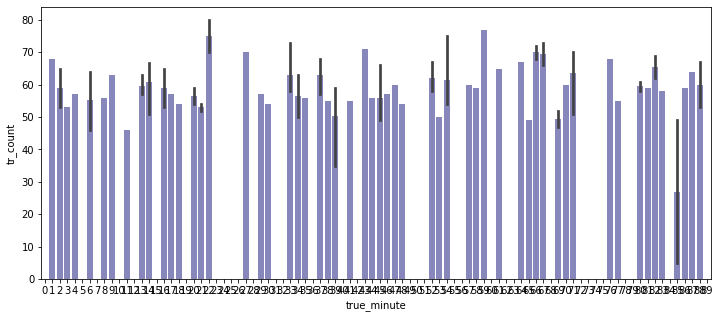

In [72]:
plt.figure(figsize=(12,5))
sns.barplot(x='true_minute', y='tr_count', 
                 data=df, color='darkblue', alpha=0.5)
#ax.set(xlabel='Driver score', ylabel='Percentage')
#sns.despine()   убрать часть рамки графика
plt.show()

In [ ]:
#    Дополнительный проект 

In [ ]:
# В папке subsid (shared/homeworks/python_ds_miniprojects/5_subsid) находятся файлы с продажами продуктов через телемаркетинг. 
# Каждый файл содержит, как минимум, 4 колонки (поля): FILIAL_ID, SUBS_ID, PROD_ID, ACT_DTTM.

# Суть задачи в том, чтобы проверить подключения продуктов определенным пользователям, 
# соединив файлы о продажах с логами по подключениям в системе.

In [64]:
#  просмотр что лежит в папке
lst = os.listdir('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/shared/homeworks/python_ds_miniprojects/5_subsid/subsid/')
lst

['prod_activations_logs.csv',
 'tm_sales_1.csv',
 'tm_sales_2.csv',
 'tm_sales_3.csv']

In [ ]:
Особенности данных:

1. сотрудники телемаркетинга не всегда указывают полный id, если 'id' нет в начале SUBS_ID, то нужно его добавить
2. поля в файлах могут быть расположены абсолютно случайным образом, но названия полей статичны
3. продажа не засчитывается, если отключение (END_DTTM) произошло меньше чем через 5 минут после подключения (START_DTTM)
4. если в файле с продажами встречается строка без указанного SUBS_ID, она пропускается

Сохраните результат в csv файл с разделителем ;, содержащий корректные подключения.

In [65]:
path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/shared/homeworks/python_ds_miniprojects/5_subsid/subsid/'

df_list = []
for i in lst:
    if 'tm_sales' in i:
        df = pd.read_csv(path_to_file + i, sep=';')     
        df_list.append(df)   
df_list

[     SUBS_ID  FILIAL_ID  PROD_ID          ACT_DTTM
 0  id4651830          1     1954  20-03-2020 14:59
 1    7646509          5     6431  19-03-2020 13:00
 2  id7412683          4     3313  22-03-2020 17:25,
    FILIAL_ID    SUBS_ID  PROD_ID          ACT_DTTM
 0          3  id5416547     1743  17-03-2020 10:17
 1          4        NaN     7421  12-03-2020 11:25
 2          7    8362218     9879  05-03-2020 11:42
 3          2    2185490     3210  16-03-2020 16:28,
    FILIAL_ID  PROD_ID    SUBS_ID          ACT_DTTM
 0          3     1499  id5764122  18-03-2020 15:44
 1          6     3020  id7642700  15-03-2020 14:21
 2          2     5677  id1374509  17-03-2020 11:48]

In [66]:
# соединяем три датафрейма с продажами, убираем нулевые значения
df_sales = pd.concat(df_list).dropna().reset_index()      
df_sales

,index,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,0,id4651830,1,1954,20-03-2020 14:59
1,1,7646509,5,6431,19-03-2020 13:00
2,2,id7412683,4,3313,22-03-2020 17:25
3,0,id5416547,3,1743,17-03-2020 10:17
4,2,8362218,7,9879,05-03-2020 11:42
5,3,2185490,2,3210,16-03-2020 16:28
6,0,id5764122,3,1499,18-03-2020 15:44
7,1,id7642700,6,3020,15-03-2020 14:21
8,2,id1374509,2,5677,17-03-2020 11:48


In [67]:
def add_id(x):
    if x.startswith('id')==False:
        sub_id = 'id' + x
        return sub_id
    else:
        return x
    
# применяем функцию добавления id к столбцу SUBS_ID

df_sales['SUBS_ID'] = df_sales.SUBS_ID.apply(add_id)  
df_sales

,index,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,0,id4651830,1,1954,20-03-2020 14:59
1,1,id7646509,5,6431,19-03-2020 13:00
2,2,id7412683,4,3313,22-03-2020 17:25
3,0,id5416547,3,1743,17-03-2020 10:17
4,2,id8362218,7,9879,05-03-2020 11:42
5,3,id2185490,2,3210,16-03-2020 16:28
6,0,id5764122,3,1499,18-03-2020 15:44
7,1,id7642700,6,3020,15-03-2020 14:21
8,2,id1374509,2,5677,17-03-2020 11:48


In [68]:
df_sales.dtypes

index         int64
SUBS_ID      object
FILIAL_ID     int64
PROD_ID       int64
ACT_DTTM     object
dtype: object

In [69]:
prod_path = path_to_file + 'prod_activations_logs.csv'
prod_activations_logs = pd.read_csv(prod_path, sep=';')
prod_activations_logs

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM
1,id4651830,1954,20-03-2020 14:59,01-12-2020 00:00
5,id7646509,6431,19-03-2020 13:00,19-03-2020 13:03
2,id7461794,3310,20-03-2020 17:25,01-12-2020 00:00
3,id5416547,1743,17-03-2020 10:17,25-03-2020 11:00
4,id8238421,1859,01-03-2020 11:42,01-03-2020 11:43
3,id8641743,2752,20-03-2020 15:44,21-04-2020 15:44
2,id2185490,3210,16-03-2020 16:28,01-12-2020 00:00
6,id7642700,3020,15-03-2020 14:21,15-03-2020 23:42
2,id8741631,5677,19-03-2020 12:28,01-12-2020 00:00


In [70]:
prod_activations_logs.dtypes

SUBS_ID       object
PROD_ID        int64
START_DTTM    object
END_DTTM      object
dtype: object

In [71]:
prod_activations_logs['START_DTTM'] = pd.to_datetime(prod_activations_logs.START_DTTM, format='%d-%m-%Y %H:%M')
prod_activations_logs['END_DTTM']   = pd.to_datetime(prod_activations_logs.END_DTTM, format='%d-%m-%Y %H:%M')

In [72]:
# меняем формат даты
df_sales['ACT_DTTM']   = pd.to_datetime(df_sales.ACT_DTTM)

In [73]:
all_data = prod_activations_logs.merge(df_sales, how='inner', on=['SUBS_ID', 'PROD_ID'])
all_data

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM,index,FILIAL_ID,ACT_DTTM
0,id4651830,1954,2020-03-20 14:59:00,2020-12-01 00:00:00,0,1,2020-03-20 14:59:00
1,id7646509,6431,2020-03-19 13:00:00,2020-03-19 13:03:00,1,5,2020-03-19 13:00:00
2,id5416547,1743,2020-03-17 10:17:00,2020-03-25 11:00:00,0,3,2020-03-17 10:17:00
3,id2185490,3210,2020-03-16 16:28:00,2020-12-01 00:00:00,3,2,2020-03-16 16:28:00
4,id7642700,3020,2020-03-15 14:21:00,2020-03-15 23:42:00,1,6,2020-03-15 14:21:00


In [75]:
all_data['difference'] = all_data.END_DTTM - all_data.START_DTTM
all_data

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM,index,FILIAL_ID,ACT_DTTM,difference
0,id4651830,1954,2020-03-20 14:59:00,2020-12-01 00:00:00,0,1,2020-03-20 14:59:00,255 days 09:01:00
1,id7646509,6431,2020-03-19 13:00:00,2020-03-19 13:03:00,1,5,2020-03-19 13:00:00,0 days 00:03:00
2,id5416547,1743,2020-03-17 10:17:00,2020-03-25 11:00:00,0,3,2020-03-17 10:17:00,8 days 00:43:00
3,id2185490,3210,2020-03-16 16:28:00,2020-12-01 00:00:00,3,2,2020-03-16 16:28:00,259 days 07:32:00
4,id7642700,3020,2020-03-15 14:21:00,2020-03-15 23:42:00,1,6,2020-03-15 14:21:00,0 days 09:21:00


In [84]:
result = all_data.query('difference > "5m"').sort_values('SUBS_ID', ascending=True)
result

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM,index,FILIAL_ID,ACT_DTTM,difference
3,id2185490,3210,2020-03-16 16:28:00,2020-12-01 00:00:00,3,2,2020-03-16 16:28:00,259 days 07:32:00
0,id4651830,1954,2020-03-20 14:59:00,2020-12-01 00:00:00,0,1,2020-03-20 14:59:00,255 days 09:01:00
2,id5416547,1743,2020-03-17 10:17:00,2020-03-25 11:00:00,0,3,2020-03-17 10:17:00,8 days 00:43:00
4,id7642700,3020,2020-03-15 14:21:00,2020-03-15 23:42:00,1,6,2020-03-15 14:21:00,0 days 09:21:00


In [80]:
result = result[['ACT_DTTM', 'FILIAL_ID', 'difference']]
result

,ACT_DTTM,FILIAL_ID,difference
3,2020-03-16 16:28:00,2,259 days 07:32:00
0,2020-03-20 14:59:00,1,255 days 09:01:00
2,2020-03-17 10:17:00,3,8 days 00:43:00
4,2020-03-15 14:21:00,6,0 days 09:21:00


In [89]:
result.SUBS_ID

3    id2185490
0    id4651830
2    id5416547
4    id7642700
Name: SUBS_ID, dtype: object

In [82]:
result.to_csv('result.csv', sep = ';')